In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [4]:
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),strides=1,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

C:\Users\aksha\OneDrive\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 220,234 (860.29 KB)

 Trainable params: 220,234 (860.29 KB)

 Non-trainable params: 0 (0.00 B)

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.
(60000, 28, 28)
(60000,)


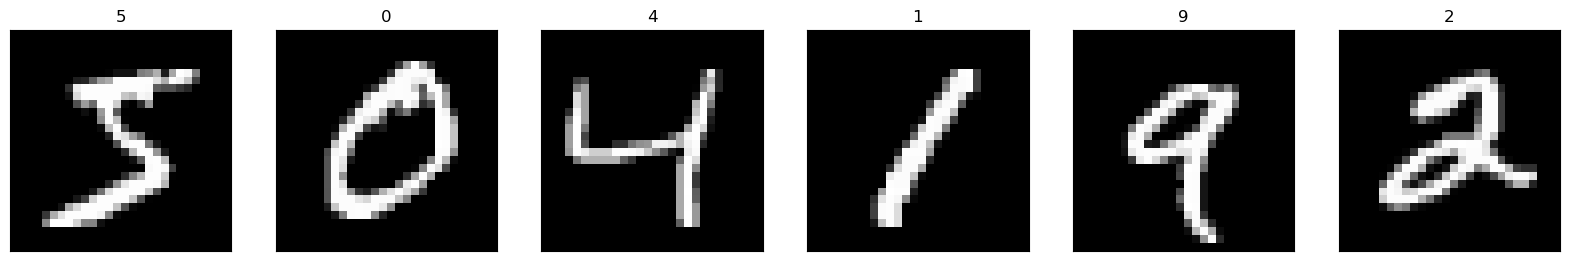

In [1]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

print(X_train.shape)  # Should be (num_samples, height, width) or (num_samples, height, width, channels)
print(y_train.shape) 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))
plt.show()

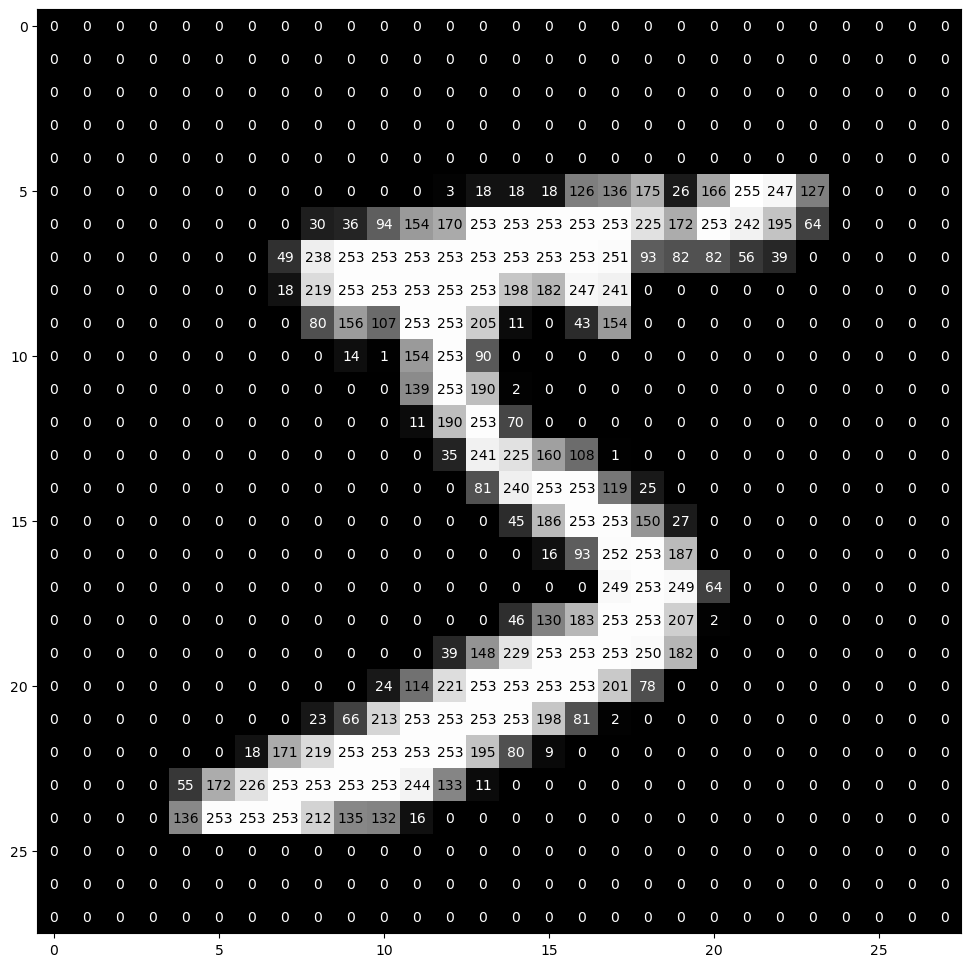

In [2]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)
plt.show()

In [3]:
# rescale to have values within 0 - 1 range [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [4]:
from tensorflow.keras.utils import to_categorical
import numpy as np

num_classes = 10 

# Print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])


Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print("The database has a training set of %d examples." % len(X_train))
print("The database has a test set of %d examples." % len(X_test))
print(X_train.shape)  # Should be (num_samples, height, width) or (num_samples, height, width, channels)
print(y_train.shape) 

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))
plt.show()

def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)
plt.show()

# rescale to have values within 0 - 1 range [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

from tensorflow.keras.utils import to_categorical
import numpy as np

num_classes = 10 

# Print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

# input image dimensions 28x28 pixel images. 
img_rows, img_cols = 28,28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1) #(batch_size, height, width, channels)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('input_shape: ', input_shape)
print('x_train shape:', X_train.shape)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=6, kernel_size=(5,5), activation="tanh", input_shape=(28,28,1)),
    layers.AveragePooling2D(pool_size=(2,2), strides=2),

    layers.Conv2D(filters=16, kernel_size=(5,5), activation="tanh"),
    layers.AveragePooling2D(pool_size=(2,2), strides=2),

    # C5 (3rd Conv Layer)
    layers.Conv2D(filters=120, kernel_size=(5,5), activation="tanh", padding="SAME"),

    layers.Flatten(),
    layers.Dense(units=84, activation="tanh"),
    layers.Dense(units=10, activation="softmax")  # Output layer

])

# Show the model summary
model.summary()

# rmsprop and Adaptive learning rate (adaDelta) are popular form of gradient descent rivaled only by adam and adagrad 
# categorical ce since we have multiple classes (10) 

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# load the weights that yielded the best validation accuracy
model.load_weights('model.keras')

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 74s 0us/step


NameError: name 'X_train' is not defined

The database has a training set of 50000 examples.
The database has a test set of 10000 examples.
(50000, 32, 32, 3)
(50000, 1)


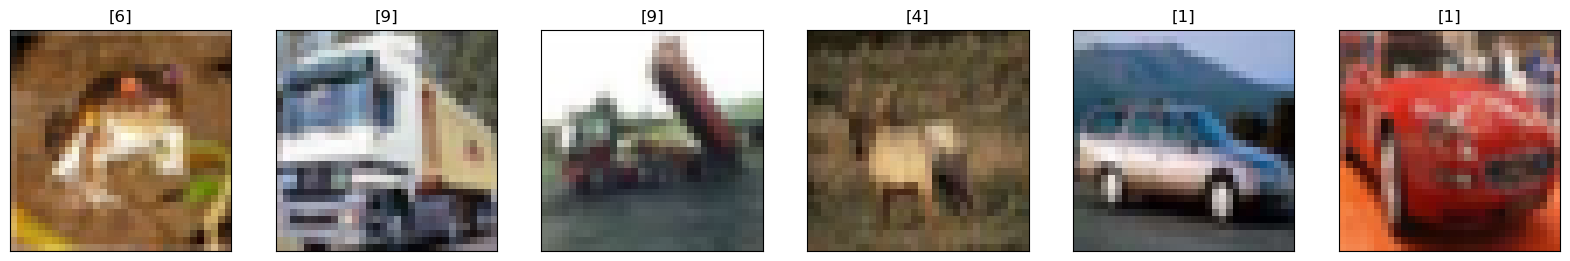

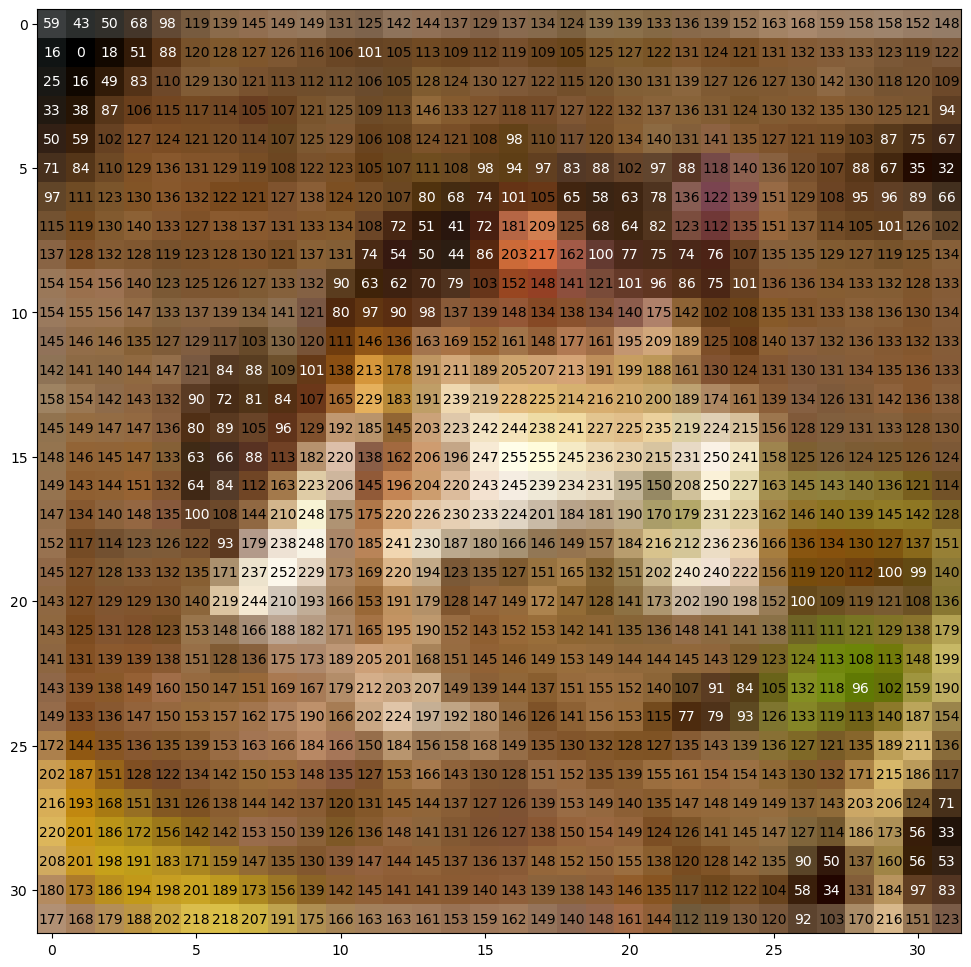

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Integer-valued labels:
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
One-hot labels:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
input_shape:  (32, 32, 3)
x_train shape: (50000, 32, 32, 3)


C:\Users\aksha\OneDrive\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 5, 5, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 84)                  │         252,084 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303,926 (1.16 MB)

 Trainable params: 303,926 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.3142 - loss: 1.9293 - val_accuracy: 0.3949 - val_loss: 1.7078
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.4326 - loss: 1.6080 - val_accuracy: 0.4379 - val_loss: 1.5753
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.4614 - loss: 1.5209 - val_accuracy: 0.4498 - val_loss: 1.5302
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.4734 - loss: 1.4884 - val_accuracy: 0.4556 - val_loss: 1.5520
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.4811 - loss: 1.4597 - val_accuracy: 0.4636 - val_loss: 1.5027
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.4888 - loss: 1.4528 - val_accuracy: 0.4653 - val_loss: 1.5029
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.4916 - loss: 1.4344 - val_accuracy: 0.4709 - val_loss: 1.5113
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.4905 -

C:\Users\aksha\OneDrive\anaconda\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


ValueError: A total of 5 objects could not be loaded. Example error message for object <Conv2D name=conv2d, built=True>:

The shape of the target variable and the shape of the target value in `variable.assign(value)` must match. variable.shape=(5, 5, 3, 6), Received: value.shape=(3, 3, 1, 32). Target variable: <Variable path=sequential/conv2d/kernel, shape=(5, 5, 3, 6), dtype=float32, value=[[[[ 0.06174946 -0.07468303 -0.13294536 -0.15612502  0.02471932
    -0.14163847]
   [ 0.07006323 -0.21716547  0.12399816  0.20675233 -0.00345838
     0.16419037]
   [-0.08410184 -0.02073154  0.15433246 -0.07890278  0.23102082
     0.07872108]]

  [[ 0.05278696 -0.06096397  0.06300207 -0.12249374  0.11969063
    -0.21972162]
   [ 0.0410447  -0.07080226 -0.0010296   0.19322526 -0.18091108
     0.10854901]
   [-0.00319118  0.14392075  0.26175493 -0.20203237  0.23067217
    -0.00614325]]

  [[ 0.03906423  0.23034196 -0.14121608 -0.10093518 -0.0647513
    -0.08263477]
   [ 0.0637005   0.03963457  0.16592814  0.18899822 -0.04733158
    -0.02454225]
   [ 0.12684034  0.08479416 -0.0564265  -0.19003737 -0.05531695
     0.16039681]]

  [[-0.08180998  0.23898363  0.0016054   0.05637917 -0.02433743
    -0.24775483]
   [-0.13108523  0.16602215 -0.0485552   0.24043271 -0.04259364
     0.19360074]
   [ 0.02737121  0.02299805  0.19014306  0.05201615  0.11846697
     0.21164536]]

  [[ 0.02765397 -0.11010475 -0.06591877 -0.02065922 -0.14843951
    -0.14449029]
   [ 0.04364368  0.06760564  0.08741654  0.23362118 -0.30140966
    -0.09240426]
   [ 0.09866589  0.23450331  0.09254921  0.00205664  0.04340275
     0.2660237 ]]]


 [[[ 0.21278398 -0.09557691 -0.19078676 -0.13352305  0.25148755
    -0.19801576]
   [-0.12416512 -0.27942383 -0.03524313  0.23573273  0.12176523
     0.05667025]
   [-0.06584642 -0.21253464 -0.00094976 -0.11550221  0.00203581
     0.16792478]]

  [[-0.05802351  0.10301203  0.06138011  0.01975216  0.05459942
    -0.04796467]
   [ 0.01125447 -0.166291    0.11908111  0.1804818  -0.10777979
     0.02098013]
   [-0.1477314   0.03517186 -0.08296083 -0.18823607 -0.07102628
    -0.00131487]]

  [[ 0.01671003  0.11047842  0.10083873 -0.19570276  0.10187458
    -0.00927383]
   [ 0.15099576 -0.05761223  0.1254849   0.11325738  0.11002763
     0.16186532]
   [ 0.05163682  0.20431489 -0.07854439 -0.09355915  0.06892675
     0.11601996]]

  [[-0.04361447  0.02146561  0.01522766  0.04052535  0.01730592
    -0.05404226]
   [ 0.07185321  0.06459924  0.00087737  0.02729207 -0.20331052
     0.05404616]
   [ 0.11348757 -0.07964491 -0.02628717  0.0371376  -0.00145511
    -0.0688225 ]]

  [[-0.13196032  0.16910025  0.11758768 -0.19881453 -0.04535191
    -0.20065114]
   [-0.13787587 -0.06730016  0.13073006  0.14715001 -0.20829226
    -0.04064156]
   [ 0.2207566  -0.12073293  0.20265566 -0.2060943  -0.00942922
     0.2226827 ]]]


 [[[ 0.24496505 -0.06589751  0.06766419  0.06786816  0.2083379
    -0.1737202 ]
   [-0.07662708 -0.10986993 -0.17792502  0.262292    0.17301743
     0.12364876]
   [-0.09262119 -0.2569007  -0.07453173 -0.1741056   0.15748681
    -0.04808498]]

  [[ 0.13456118 -0.02398765  0.12977983  0.10050094  0.22853315
    -0.22088495]
   [ 0.07039788  0.00614811  0.0554817   0.0422633  -0.08244043
     0.18126678]
   [ 0.09410215 -0.08081249  0.11933732 -0.10435984 -0.04520091
    -0.07275839]]

  [[-0.02211793 -0.00875061 -0.06098168 -0.07822634  0.13956897
    -0.22749132]
   [-0.12669685 -0.02938723 -0.01352447  0.08120508 -0.04236593
     0.17668955]
   [ 0.03048992  0.08811697 -0.00425679 -0.15409516  0.14447004
     0.18788756]]

  [[ 0.14793018  0.13499571 -0.1418421   0.11886096  0.11204313
    -0.13726796]
   [ 0.09474276 -0.14437653  0.07974814  0.10761364  0.04510163
     0.07751381]
   [-0.09826258  0.13883564  0.00851723 -0.13479404 -0.12202201
    -0.04325816]]

  [[-0.10460985  0.159337   -0.06847859 -0.12408043 -0.16320302
    -0.15795411]
   [-0.05767249  0.08405352 -0.03986302  0.22123434 -0.1935021
     0.17760041]
   [-0.04439919 -0.06865896 -0.01374541 -0.24942252 -0.04668396
     0.09888449]]]


 [[[ 0.11731475 -0.14858554 -0.16017304 -0.01400966  0.12051607
    -0.06758224]
   [ 0.12256061 -0.22910845  0.05151482  0.06807473 -0.07948866
     0.03660604]
   [-0.07014575 -0.16990319  0.1261243  -0.19664024  0.22206052
     0.04592208]]

  [[ 0.16997956  0.2031221   0.15582979 -0.19875348  0.0597828
    -0.23695841]
   [-0.05251554  0.01013998 -0.14171825  0.26840946  0.09049067
     0.160471  ]
   [-0.11921724  0.1184021   0.12165306  0.0468109   0.2215637
     0.12157252]]

  [[-0.00912616  0.04446744  0.04619036  0.05765619  0.14007555
    -0.10723914]
   [ 0.00089702 -0.10054363 -0.05537013  0.22884947 -0.16247493
    -0.0048608 ]
   [ 0.00893067 -0.00937271  0.0364528   0.07298037  0.17412248
     0.09434649]]

  [[ 0.07274767  0.14787938 -0.11650457 -0.04219652 -0.14344053
    -0.26468948]
   [-0.09838982 -0.06048999 -0.13849726  0.19669318 -0.14146572
     0.07570857]
   [-0.08874585  0.21665268  0.06350574 -0.24051377  0.08712704
     0.00515858]]

  [[-0.05691116 -0.03243653 -0.01736858 -0.05911887 -0.19497839
    -0.286147  ]
   [-0.20923288 -0.04497639  0.14572874  0.18954015 -0.04915438
     0.17506869]
   [ 0.15580338  0.02920678 -0.01869051 -0.2297601  -0.11173522
     0.10772688]]]


 [[[ 0.20287183 -0.22797036  0.02294818 -0.09392025  0.11416613
    -0.1654179 ]
   [-0.12434018 -0.1334425  -0.10921939  0.19786038 -0.1587947
     0.14675796]
   [-0.23730464  0.05827754 -0.03286016 -0.08924202 -0.0405624
     0.19445193]]

  [[ 0.12458868 -0.10102456 -0.06078294 -0.20166668 -0.05499024
    -0.06782909]
   [-0.10988997  0.07599103 -0.00794222  0.14553498 -0.16371785
    -0.03297852]
   [ 0.07872285  0.10239502  0.06827019 -0.02519132  0.14855012
    -0.01508952]]

  [[ 0.17348571 -0.11153235  0.04703277 -0.16438295 -0.1655851
     0.00776307]
   [ 0.04535276 -0.15056762  0.16040023  0.22908928  0.03492214
    -0.11143278]
   [-0.15539141 -0.01319292  0.10343367 -0.0884056  -0.05307556
     0.07445704]]

  [[ 0.1869966   0.00704015 -0.04200613  0.08504525 -0.21553095
    -0.20221633]
   [-0.09731545 -0.11814029  0.15047783  0.08137037 -0.08729772
    -0.07301077]
   [-0.17351866 -0.04396382  0.03489974 -0.19463271 -0.06895947
     0.10744452]]

  [[ 0.1130789  -0.20510074  0.00990461 -0.17615348 -0.06748233
    -0.25211456]
   [-0.17889792 -0.12171658  0.01058424  0.0598554  -0.35683516
    -0.08993438]
   [ 0.04854731  0.15096246  0.13763753 -0.27578685 -0.06284862
     0.18787524]]]]>

List of objects that could not be loaded:
[<Conv2D name=conv2d, built=True>, <Conv2D name=conv2d_1, built=True>, <Conv2D name=conv2d_2, built=True>, <Dense name=dense, built=True>, <Dense name=dense_1, built=True>]

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Use x_train instead of X_train
print("The database has a training set of %d examples." % len(x_train))  
print("The database has a test set of %d examples." % len(x_test))  
print(x_train.shape)  # Should be (num_samples, height, width) or (num_samples, height, width, channels)
print(y_train.shape) 

import matplotlib.pyplot as plt
# %matplotlib inline # This line is usually not needed in Jupyter notebooks
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    # Use x_train instead of X_train
    ax.imshow(x_train[i], cmap='gray')  
    ax.set_title(str(y_train[i]))
plt.show()

def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    height, width, channels = img.shape  # Get image dimensions
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            # Get the pixel value (assuming grayscale, take the first channel)
            pixel_value = img[y, x, 0]  
            # Round the pixel value
            rounded_value = round(pixel_value, 2)  
            ax.annotate(str(rounded_value), xy=(x, y),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if pixel_value < thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
# Use x_train instead of X_train
visualize_input(x_train[0], ax)  
plt.show()

# rescale to have values within 0 - 1 range [0,255] --> [0,1]
# Use x_train and x_test for consistency
x_train = x_train.astype('float32')/255  
x_test = x_test.astype('float32')/255  

print('x_train shape:', x_train.shape) # Changed to x_train
print(x_train.shape[0], 'train samples') # Changed to x_train
print(x_test.shape[0], 'test samples')

from tensorflow.keras.utils import to_categorical
import numpy as np

num_classes = 10 

# Print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])
 
# input image dimensions 32x32 pixel images. 
img_rows, img_cols = 32, 32  # Changed to 32x32

# Reshape x_train and x_test, not X_train and X_test
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3) # Changed to 3 channels
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3) # Changed to 3 channels
input_shape = (img_rows, img_cols, 3) # Changed to 3 channels

print('input_shape: ', input_shape)
# Print x_train shape
print('x_train shape:', x_train.shape) # Changed to x_train

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=6, kernel_size=(5,5), activation="tanh", input_shape=(32,32,3)), # Updated input_shape
    layers.AveragePooling2D(pool_size=(2,2), strides=2),

    layers.Conv2D(filters=16, kernel_size=(5,5), activation="tanh"),
    layers.AveragePooling2D(pool_size=(2,2), strides=2),

    # C5 (3rd Conv Layer)
    layers.Conv2D(filters=120, kernel_size=(5,5), activation="tanh", padding="SAME"),

    layers.Flatten(),
    layers.Dense(units=84, activation="tanh"),
    layers.Dense(units=10, activation="softmax")  # Output layer

])

# Show the model summary
model.summary()

# rmsprop and Adaptive learning rate (adaDelta) are popular form of gradient descent rivaled only by adam and adagrad 
# categorical ce since we have multiple classes (10) 

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

# Use x_train and x_test when fitting the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))  

# load the weights that yielded the best validation accuracy
model.load_weights('model.keras')

# evaluate test accuracy
# Use x_test and y_test for evaluation
score = model.evaluate(x_test, y_test, verbose=0)  
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)